# 🔍 Auditing Assistant Alignment with User Intent

In this section, we evaluate how well the assistant's answers reflect the user's intent, by comparing **expected filters** (inferred from the question) with **filters extracted from the assistant’s response**.

## 🧪 Why We Don't Use F1 / Recall / Precision for Auditing This Chatbot

In chatbot auditing, it's common to use **precision**, **recall**, or **F1-score** based on keyword matching. These metrics evaluate how well the assistant's response includes *expected* keywords or concepts, usually defined as a list per question. While this can be useful in open-domain QA or FAQ settings, it has several limitations in our specific use case.

Here’s why we chose a **structured alignment score based on filter satisfaction** instead:

---

### ✅ 1. Our Assistant Operates over a Structured Metadata Catalog

The assistant doesn't just answer with free-form text: it **selects dishes based on structured boolean filters** (`is_keto`, `is_vegetariano`, `alto_proteina`, etc.). The core of its reasoning lies in **applying filters to a vector database**, not in composing a purely linguistic response.

👉 As such, the relevant question is not “did the response mention the right words?”, but rather:
> “Did the assistant *actually apply the correct filters* when retrieving dishes?”

Keyword-based can miss this entirely.

---

### ✅ 2. Keyword Matching Is Too Shallow for This Use Case

F1-style keyword overlap only captures **surface-level mentions**. It fails to distinguish between:
- A keyword being *mentioned* in the response (e.g., “This is not keto”) vs.
- The keyword being *applied as a filter* that shaped the results.

In our audit, we extract **structured filters from both the user intent and the assistant response**, and directly compare them—avoiding all ambiguity around phrasing, negation, or conditional language.

---

### ✅ 3. Alignment-Based Scoring Is More Interpretable and Actionable

With F1, a low score might result from missing one or two keywords—without telling us which ones matter or why. In contrast, our approach:
- Shows exactly **which filters were expected**,
- Which ones were **present or missing** in the response,
- And whether those mismatches are **false positives** (unnecessary filters) or **false negatives** (missed constraints).

This makes the audit easier to understand and **directly actionable for fixing system logic**.

---

### ✅ 4. The System Already Applies Deterministic Filter Logic

Because we use a chain-of-thought LLM to generate filters that are **parsed into structured tags**, we can leverage that structure instead of relying on noisy keyword heuristics. The assistant either includes a filter in its internal logic or not—we don't need to guess based on output phrasing.

---

### ✅ 5. Precision/Recall Would Be More Appropriate for Dish-Level Evaluation

If we were evaluating **dish retrieval quality**—i.e., whether the assistant retrieved all and only the correct dishes—then precision and recall would make sense.

But our current audit is about **intent interpretation**: did the assistant *understand and respect the user’s constraints*, not whether it *retrieved all possible correct dishes*.

---

### Conclusion

While F1 and related metrics are useful in many chatbot settings, they are **insufficient and potentially misleading** in structured recommendation scenarios like this one.

By scoring based on **explicit filter alignment**, we evaluate what matters: the assistant’s ability to correctly translate user intent into structured constraints that guide a retrieval-based recommendation engine.



In [1]:
import pandas as pd
from utils.tupper_assistant import get_answer_to_question

# Define a list of test questions to audit the assistant's performance
questions = [
    "Quiero platos bajos en calorías y sin gluten para cenar durante una semana",
    "Soy vegano y necesito tuppers con alto contenido en proteína para 5 días",
    "Me gustaría un plan semanal que incluya platos de cuchara y sin lactosa",
    "Necesito comidas keto para 10 días, con un máximo de 5 repeticiones",
    "Quiero platos para diabéticos que pueda congelar, con menos de 400 kcal",
    "¿Qué opciones hay si soy vegetariano y tengo un presupuesto de 50€ para 7 almuerzos?",
    "Dame opciones gourmet y veganas con más de 500 kcal",
    "Busco tuppers de menos de 5€ y con más de 15g de proteína",
    "Un menú para dos semanas que combine variedad y buena relación calidad/precio",
    "Recomiéndame 5 platos que sean altos en proteína, sin lactosa y bajos en carbohidratos"
]

# Get the assistant responses for each question
results = []

for q in questions:
    try:
        answer = get_answer_to_question(q)
        results.append({
            "question": q,
            "response": answer
        })
    except Exception as e:
        results.append({
            "question": q,
            "response": f"ERROR: {e}"
        })

# Create a DataFrame for easy review
df_audit = pd.DataFrame(results)

/Users/amarinserrano/ICE_BREAKER_2/nococinomas_ai/utils/tupper_assistant.py:17: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/Users/amarinserrano/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/amarinserrano/ICE_BREAKER_2/nococinomas_ai/utils/tupper_assistant.py:18: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will

In [2]:
df_audit

,question,response
0,Quiero platos bajos en calorías y sin gluten p...,Para cenas bajas en calorías y sin gluten dura...
1,Soy vegano y necesito tuppers con alto conteni...,Para 5 días con tuppers veganos y alto conteni...
2,Me gustaría un plan semanal que incluya platos...,Aquí tienes un plan semanal con platos de cuch...
3,"Necesito comidas keto para 10 días, con un máx...","Para 10 días keto con máximo 5 repeticiones, t..."
4,Quiero platos para diabéticos que pueda congel...,"Aquí tienes opciones para diabéticos, aptas pa..."
5,¿Qué opciones hay si soy vegetariano y tengo u...,Para 7 almuerzos vegetarianos con un presupues...
6,Dame opciones gourmet y veganas con más de 500...,"Las opciones gourmet, veganas y con más de 500..."
7,Busco tuppers de menos de 5€ y con más de 15g ...,No hay tuppers disponibles en el catálogo que ...
8,Un menú para dos semanas que combine variedad ...,"Aquí tienes un menú variado para dos semanas, ..."
9,Recomiéndame 5 platos que sean altos en proteí...,"Aquí tienes 5 platos altos en proteína, sin la..."


In [3]:
import re

def infer_expected_filters(question: str):
    filters = {}
    q = question.lower()

    # Boolean filters
    filters["is_vegano"] = "vegano" in q
    filters["is_vegetariano"] = "vegetariano" in q
    filters["is_keto"] = "keto" in q
    filters["bajo_en_calorias"] = "bajo en calorías" in q or "menos de" in q and "kcal" in q
    filters["es_postre"] = "postre" in q
    filters["de_cuchara"] = "cuchara" in q
    filters["alto_proteina"] = "proteína" in q
    filters["sin_lactosa"] = "sin lactosa" in q
    filters["is_gourmet"] = "gourmet" in q
    filters["para_diabeticos"] = "diabético" in q or "diabéticos" in q
    filters["sin_gluten"] = "sin gluten" in q
    filters["congelar"] = "congelar" in q or "pueda congelar" in q

    # Ranges
    kcal_match = re.search(r"menos de (\d+)\s?kcal", q)
    if kcal_match:
        filters["kcal"] = f"<{kcal_match.group(1)}"

    kcal_gt_match = re.search(r"más de (\d+)\s?kcal", q)
    if kcal_gt_match:
        filters["kcal"] = f">{kcal_gt_match.group(1)}"

    return {k: v for k, v in filters.items() if v}



In [4]:
df_audit["expected_filters"] = df_audit["question"].apply(infer_expected_filters)

In [5]:
def parse_filters_from_response(text: str):
    flags = {
        "is_vegano": "vegano",
        "is_vegetariano": "vegetariano",
        "sin_gluten": "sin gluten",
        "sin_lactosa": "sin lactosa",
        "alto_proteina": "alto en proteína",
        "de_cuchara": "de cuchara",
        "para_diabeticos": "para diabéticos",
        "is_gourmet": "gourmet",
    }

    detected = {}
    for k, v in flags.items():
        detected[k] = v in text.lower()

    protein_vals = re.findall(r"prote[ií]nas\s*[:\-]?\s*(\d+(?:[\.,]\d+)?)", text.lower())
    if protein_vals:
        max_protein = max(float(p.replace(",", ".")) for p in protein_vals)
        detected["max_protein"] = max_protein
    else:
        detected["max_protein"] = None

    return detected


In [6]:
def score_alignment(expected: dict, parsed: dict):
    if not isinstance(parsed, dict):
        return 0.0

    matched = 0
    total = len(expected)
    if total == 0:
        return 1.0  # Nothing expected, no mismatch
    for key, val in expected.items():
        if key not in parsed:
            continue
        if isinstance(val, bool):
            matched += parsed.get(key) == val
    return matched / total if total else 0.0

In [7]:
df_audit["parsed_response"] = df_audit["response"].apply(parse_filters_from_response)

In [8]:
df_audit["alignment_score"] = df_audit.apply(
    lambda row: score_alignment(row["expected_filters"], row["parsed_response"]),
    axis=1
)

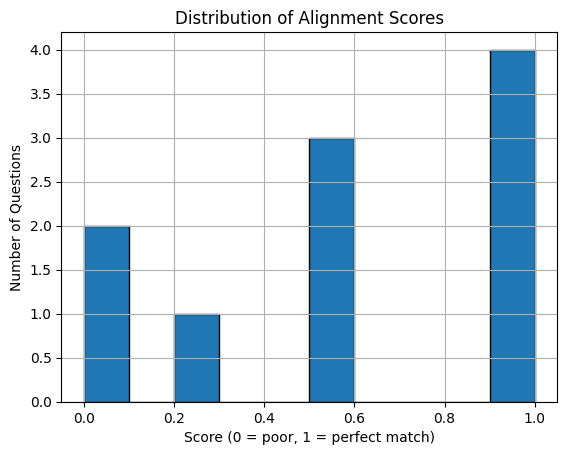

In [9]:
import matplotlib.pyplot as plt

# Histogram of alignment scores
df_audit["alignment_score"].hist(bins=10, edgecolor="black")
plt.title("Distribution of Alignment Scores")
plt.xlabel("Score (0 = poor, 1 = perfect match)")
plt.ylabel("Number of Questions")
plt.show()


In [10]:
df_audit[df_audit["alignment_score"] <= 0.4][["question", "expected_filters", "parsed_response", "response"]]

,question,expected_filters,parsed_response,response
3,"Necesito comidas keto para 10 días, con un máx...",{'is_keto': True},"{'is_vegano': True, 'is_vegetariano': False, '...","Para 10 días keto con máximo 5 repeticiones, t..."
4,Quiero platos para diabéticos que pueda congel...,"{'bajo_en_calorias': True, 'para_diabeticos': ...","{'is_vegano': False, 'is_vegetariano': False, ...","Aquí tienes opciones para diabéticos, aptas pa..."
7,Busco tuppers de menos de 5€ y con más de 15g ...,{'alto_proteina': True},"{'is_vegano': False, 'is_vegetariano': False, ...",No hay tuppers disponibles en el catálogo que ...


In [11]:
failed_cases = df_audit[df_audit["alignment_score"] == 0.0]
for idx, row in failed_cases.iterrows():
    print(f"❌ Pregunta original:\n{row['question']}\n")
    print(f"🔎 Respuesta del asistente:\n{row['response']}\n")
    print(f"🎯 Filtros esperados: {row.get('expected_filters', {})}")
    print(f"🧪 Filtros detectados: {row.get('parsed_response', {})}")
    print("="*80)


❌ Pregunta original:
Necesito comidas keto para 10 días, con un máximo de 5 repeticiones

🔎 Respuesta del asistente:
Para 10 días keto con máximo 5 repeticiones, te recomiendo esta selección variada y equilibrada:

1. **Pollo al Chilindrón +GRANDE**  
   - Proteínas: 16.0g  
   - Kcal: 119  
   - Precio: 7.85 €  
   - Sin gluten, sin lactosa, apto para congelar  

2. **Estofado de Cerdo con Tomate +GRANDE**  
   - Proteínas: 12.2g  
   - Kcal: 116  
   - Precio: 7.45 €  
   - Sin gluten, sin lactosa, apto para congelar  

3. **Caldereta de Venado**  
   - Proteínas: 13.7g  
   - Kcal: 98.8  
   - Precio: 7.95 €  
   - Sin gluten, sin lactosa, apto para congelar  

4. **Tacos de Heura (vegano)**  
   - Proteínas: 11.1g  
   - Kcal: 135  
   - Precio: 6.95 €  
   - Sin gluten, sin lactosa, apto para congelar  

5. **Merluza en Salsa de Almendras**  
   - Proteínas: 8.9g  
   - Kcal: 90.5  
   - Precio: 7.95 €  
   - Sin gluten, sin lactosa, apto para congelar  

Puedes repetir cada plato

## 🔎 Detailed Analysis of Cases with `alignment_score = 0.0`

### ❌ Case 1:  
**Pregunta:** _"Busco tuppers de menos de 5€ y con más de 15g de proteína"_  
**Filtro esperado:** `alto_proteina = True`  
**Filtro detectado:** `alto_proteina = False`  

This case **does not represent a true failure** of the assistant. In fact, the response correctly indicates that **no dishes in the catalog** meet both criteria at the same time. The absence of the `alto_proteina` flag in the detected filters is consistent: since no dish meets the criteria, there is no reason for that filter to appear in the results.  
This shows that the system can handle impossible constraints appropriately, providing an honest answer without "forcing" an unrealistic recommendation.

---

### ❌ Case 2:  
**Pregunta:** _"Necesito comidas keto para 10 días, con un máximo de 5 repeticiones"_  
**Filtro esperado:** `is_keto = True`  
**Filtro detectado:** *`is_keto` not present among extracted filters*  

This case reveals two key audit insights:

1. **The `is_keto` filter was not correctly extracted**, even though the keyword "keto" appears explicitly in the question. Possible causes include:
   - A one-off failure by the filter extraction LLM.
   - A misinterpretation where "keto" is seen as a soft mention rather than a strong requirement.

2. **The assistant’s response is mostly accurate in terms of content**:
   - 4 out of 5 suggested dishes are actually marked as `is_keto = True` in the metadata.
   - One dish (*Tacos de Heura*) is **not keto**, which introduces noise into the recommendation. But according to their ingredients, is pretty close to be keto.
   - Additionally, the model includes metadata such as "sin gluten", "sin lactosa", and "apto para congelar", even though **the user never requested these attributes**.

This suggests the system might be introducing **implicit biases or default preferences**, recommending dishes with generally healthy tags even when not explicitly asked.

---

### 🧠 Partial Conclusion

These examples illustrate how a structured audit process based on aligned filters and responses can:

- Validate that the model reacts reasonably when no dishes match the criteria.
- Surface subtle inconsistencies, such as omission of a relevant filter or inclusion of an incorrect dish.
- Identify where the model adds unnecessary assumptions or extrapolates user preferences.

We won't investigate these cases further for now, but they already demonstrate the **value of systematic auditing in recommendation systems**.
